In [1]:
%matplotlib notebook
import os
import os.path as path
import pandas as pd
import h5py
import numpy as np
from faker import Factory
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly
import ipywidgets as widgets
import plotly.graph_objects as go
import plotly.express as plot_x

# Local module and scripts
from pyccapt.calibration.calibration_tools import data_tools, variables, tools, reconstruction
from pyccapt.calibration.calibration_tools import reconstruction
from pyccapt.calibration.calibration_tools import widgets as wd


In [2]:
save_fig=False
plot_fig=True 

In [3]:
# flightPathLength = 110 # mm 
# # The initial value for t_0
# t0 = 51.74 # ns

# dataset name
# AL_data_b
# OLO_AL_6_data
# OLO_W_6_data
# OLO_Ni_8_data
# X6Cr17_2V30Min_5_data
# data_1029_Jun-27-2022_15-53_Pd
# data_115_Jul-27-2022_17-44_Powersweep3

In [5]:
tdc, pulse_mode, dataset, flightPathLength_d, t0_d = wd.dataset_tdc_selection()
display(tdc, pulse_mode, dataset, flightPathLength_d, t0_d)

Dropdown(description='TDC model:', options=('surface_concept', 'roentdec'), value='surface_concept')

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

Text(value='OLO_AL_6_data', description='Dataset:', placeholder='Paste ticket description here!')

Text(value='110', description='Flight path length:', placeholder='Flight path length')

Text(value='51.74', description='t0:', placeholder='T_0 of the instrument')

$$\textbf{You can specify which dataset to use in below block}$$

In [6]:
tdc_model = tdc.value
pulse_mode_ini = pulse_mode.value

dataset_name = dataset.value

flightPathLength = float(flightPathLength_d.value) # mm 
# The initial value for t_0
t0 = float(t0_d.value) # ns

p = path.abspath(path.join("", "../../../.."))

variables.init()

path_main = os.path.join(p, 'tests//data')
filename_main = path_main + '//' + dataset_name + '.h5'

variables.path = os.path.join(p, 'tests//results//ion_type_selection')
variables.result_path = os.path.join(p, 'tests/results/reconstruction/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
        
filename = variables.path + '//' + dataset_name + '//' + dataset_name + '.h5'


head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)



In [7]:
data

high_voltage (V)    pulse (V)  start_counter      t (ns)     x (mm)  \
0             5239.389648  5239.389648        20476.0  626.265702   5.762449   
1             5239.389648  5239.389648        21274.0  648.087858 -11.206531   
2             5239.389648  5239.389648        22584.0  639.583938  24.259592   
3             5239.389648  5239.389648        22746.0  627.959628  18.083265   
4             5239.389648  5239.389648        23789.0  623.357910  -1.942041   
...                   ...          ...            ...         ...        ...   
1926403       5710.397949  5710.397949        19724.0  609.401880 -15.886531   
1926404       5710.397949  5710.397949        19742.0  601.796358  11.397551   
1926405       5710.397949  5710.397949        19969.0  455.220324  31.008980   
1926406       5710.397949  5710.397949        20649.0  611.857044   2.483265   
1926407       5710.397949  5710.397949        20774.0  625.435884  34.924898   

            y (mm)  pulse_pi  ion_pp    mc (Da)   element    color  
0         4.329796       0.0     1.0  27.165212  Al27(1+)  #8fcea3  
1        26.902041     798.0     1.0  27.169202  Al27(1+)  #8fcea3  
2        15.504490    1310.0     1.0  27.094883  Al27(1+)  #8fcea3  
3        -7.545306     162.0     1.0  26.998025  Al27(1+)  #8fcea3  
4        -2.706122    1043.0     1.0  26.986939  Al27(1+)  #8fcea3  
...            ...       ...     ...        ...       ...      ...  
1926403  -9.742041      77.0     1.0  27.134127  Al27(1+)  #8fcea3  
1926404  -5.475918      18.0     1.0  26.995510  Al27(1+)  #8fcea3  
1926405  -1.719184     227.0     1.0  13.597599  Al27(2+)  #45f830  
1926406 -27.284082     680.0     1.0  27.061553  Al27(1+)  #8fcea3  
1926407  11.620408     125.0     1.0  27.120163  Al27(1+)  #8fcea3  

[1926408 rows x 11 columns]

In [14]:
# exctract needed data from Pandas data frame as an numpy array
dld_highVoltage = data['high_voltage (V)'].to_numpy()
dld_x = data['x (mm)'].to_numpy()
dld_y = data['y (mm)'].to_numpy()
mc = data['mc (Da)'].to_numpy()

10-24-2022 09:32:12 | INFO | Selected Mode = count
10-24-2022 09:32:12 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


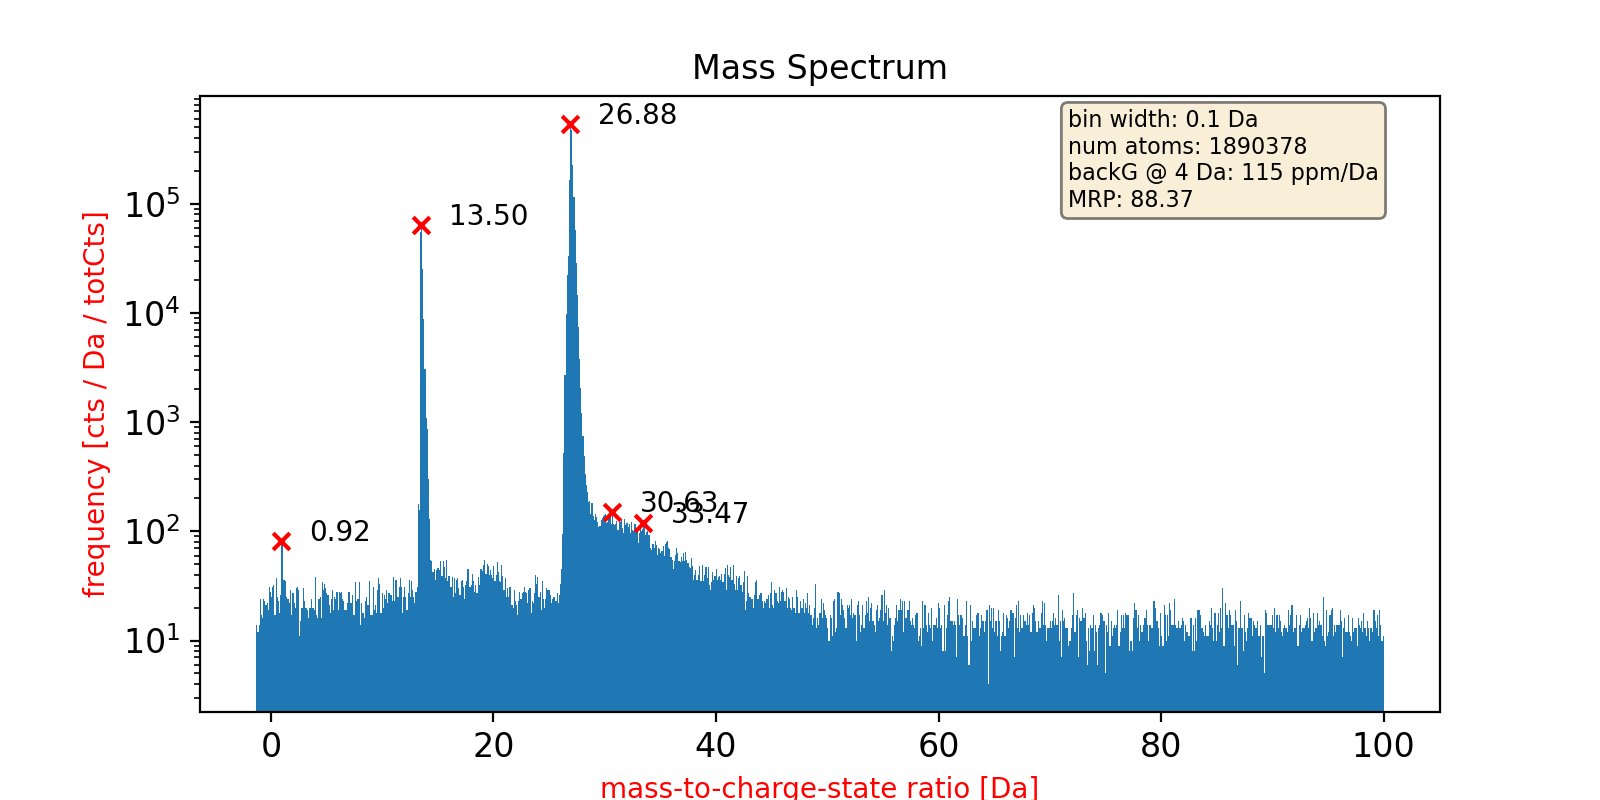

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [88.37150806]
Peaks  0 is: 0.92 peak window sides are: 0.82 - 1.13
Peaks  1 is: 13.50 peak window sides are: 13.30 - 13.60
Peaks  2 is: 26.88 peak window sides are: 26.78 - 27.09
Peaks  3 is: 30.63 peak window sides are: 26.07 - 34.08
Peaks  4 is: 33.47 peak window sides are: 26.07 - 35.91


In [9]:
max_hist_p, left_right_peaks_p, peaks_sides_p, max_paek_edges_p, index_max_p = tools.massSpecPlot(mc[mc < 100], 0.1, prominence=40, distance=2, text_loc='right', percent=50, plot=True, fig_name='mc'+figname, peaks_find_plot=True)
mrp = (max_hist_p / (left_right_peaks_p[1] - left_right_peaks_p[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
peak_list = []
for i in range(len(peaks_sides_p)):
    peak_list.append(peaks_sides_p[i,0])
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides_p[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides_p[i,2], peaks_sides_p[i,3]))

In [10]:
element = wd.density_field_selection()
display(element)

Dropdown(description='Element', options=((1, 'H', 52.7, 0.0), (2, 'He', 28.7, 0.0), (3, 'Li', 46.3, 14.0), (4,…

In [12]:
avg_dens = widgets.FloatText(
    value=element.value[2],
    description='Desnsity:',
    disabled=False
)
field_evap = widgets.FloatText(
    value=element.value[3],
    description='Filed_Evap:',
    disabled=False
)
kf = widgets.FloatText(
    value=4,
    description='K_f:',
    disabled=False
)
det_eff = widgets.FloatText(
    value=0.7,
    description='det_eff:',
    disabled=False
)
icf = widgets.FloatText(
    value=1.4,
    description='ICF:',
    disabled=False
)
flight_path_length = widgets.FloatText(
    value=110,
    description='Flight_path_lenght:',
    disabled=False
)
display(avg_dens, field_evap, kf, det_eff, icf, flight_path_length)

FloatText(value=60.2, description='Desnsity:')

FloatText(value=19.0, description='Filed_Evap:')

FloatText(value=4.0, description='K_f:')

FloatText(value=0.7, description='det_eff:')

FloatText(value=1.4, description='ICF:')

FloatText(value=110.0, description='Flight_path_lenght:')

In [15]:
px, py, pz = reconstruction.atom_probe_recons_from_detector_Gault_et_al(dld_x, dld_y, dld_highVoltage, flight_path_length=flight_path_length.value, kf=kf.value, det_eff=det_eff.value, icf=icf.value, field_evap=field_evap.value, avg_dens=60.2)

d:\pyccapt\pyccapt\calibration\calibration_tools\reconstruction.py:66: RuntimeWarning:

invalid value encountered in true_divide



In [68]:
# px, py, pz = reconstruction.atom_probe_recons_Bas_et_al(dld_x, dld_y, dld_highVoltage, flight_path_length=flight_path_length.value, kf=kf.value, det_eff=det_eff.value, icf=icf.value, field_evap=field_evap.value, avg_dens=60.2)

In [36]:
data['rx (nm)'] = px
data['ry (nm)'] = py
data['rz (nm)'] = pz

In [37]:
data

high_voltage (V)    pulse (V)  start_counter      t (ns)     x (mm)  \
0             5239.389648  5239.389648        20476.0  626.265702   5.762449   
1             5239.389648  5239.389648        21274.0  648.087858 -11.206531   
2             5239.389648  5239.389648        22584.0  639.583938  24.259592   
3             5239.389648  5239.389648        22746.0  627.959628  18.083265   
4             5239.389648  5239.389648        23789.0  623.357910  -1.942041   
...                   ...          ...            ...         ...        ...   
1926403       5710.397949  5710.397949        19724.0  609.401880 -15.886531   
1926404       5710.397949  5710.397949        19742.0  601.796358  11.397551   
1926405       5710.397949  5710.397949        19969.0  455.220324  31.008980   
1926406       5710.397949  5710.397949        20649.0  611.857044   2.483265   
1926407       5710.397949  5710.397949        20774.0  625.435884  34.924898   

            y (mm)  pulse_pi  ion_pp    mc (Da)   element    color    rx (nm)  \
0         4.329796       0.0     1.0  27.165212  Al27(1+)  #8fcea3   5.040892   
1        26.902041     798.0     1.0  27.169202  Al27(1+)  #8fcea3  -9.378520   
2        15.504490    1310.0     1.0  27.094883  Al27(1+)  #8fcea3  20.324591   
3        -7.545306     162.0     1.0  26.998025  Al27(1+)  #8fcea3  15.523897   
4        -2.706122    1043.0     1.0  26.986939  Al27(1+)  #8fcea3  -1.702873   
...            ...       ...     ...        ...       ...      ...        ...   
1926403  -9.742041      77.0     1.0  27.134127  Al27(1+)  #8fcea3 -14.894611   
1926404  -5.475918      18.0     1.0  26.995510  Al27(1+)  #8fcea3  10.799707   
1926405  -1.719184     227.0     1.0  13.597599  Al27(2+)  #45f830  28.110378   
1926406 -27.284082     680.0     1.0  27.061553  Al27(1+)  #8fcea3   2.277092   
1926407  11.620408     125.0     1.0  27.120163  Al27(1+)  #8fcea3  31.021507   

           ry (nm)   rz (nm)  
0         3.787632  0.288958  
1        22.513776  4.458303  
2        12.989601  4.357522  
3        -6.477401  2.083668  
4        -2.372856  0.061930  
...            ...       ...  
1926403  -9.133770       NaN  
1926404  -5.188686       NaN  
1926405  -1.558481       NaN  
1926406 -25.018822       NaN  
1926407  10.321650       NaN  

[1926408 rows x 14 columns]

In [141]:
# phases = ['H1(+)', 'H2(+)', 'O(++)', 'H2O(+)', 'P(3+)', 'C12(+)', '12.49', 'C13(+)', '13.47', 'Si28(+)', 'Fe57(2+)', 'Cr52(2+)', 'Fe55(2+)', 'Fe56(2+)']
# colors = ['#ab2020', '#224d90', '#47684c', '#e2e14c', '#0492c2', '#7ea1ad', '#8b324d', '#7b7cf8', '#74632b', '#eed5b7', '#50ffd6', '#c9f2c9','#99c35f', '#0c2aac']
# phases = ['H1(+)', 'Al(2+)', 'Al(+)' ]
# colors = ['#ab2020', '#224d90', '#47684c']

In [28]:

element = data.element.unique()
color = data.color.unique()
# remove zero from list
phases = [i for i in element if i != 0]
colors = [i for i in color if i != 0]
print(phases)
print(color)

['Al27(1+)', 'Al27(2+)', 'H1(1+)']
['#8fcea3' 0 '#45f830' '#e103aa']


<IPython.core.display.Javascript object>


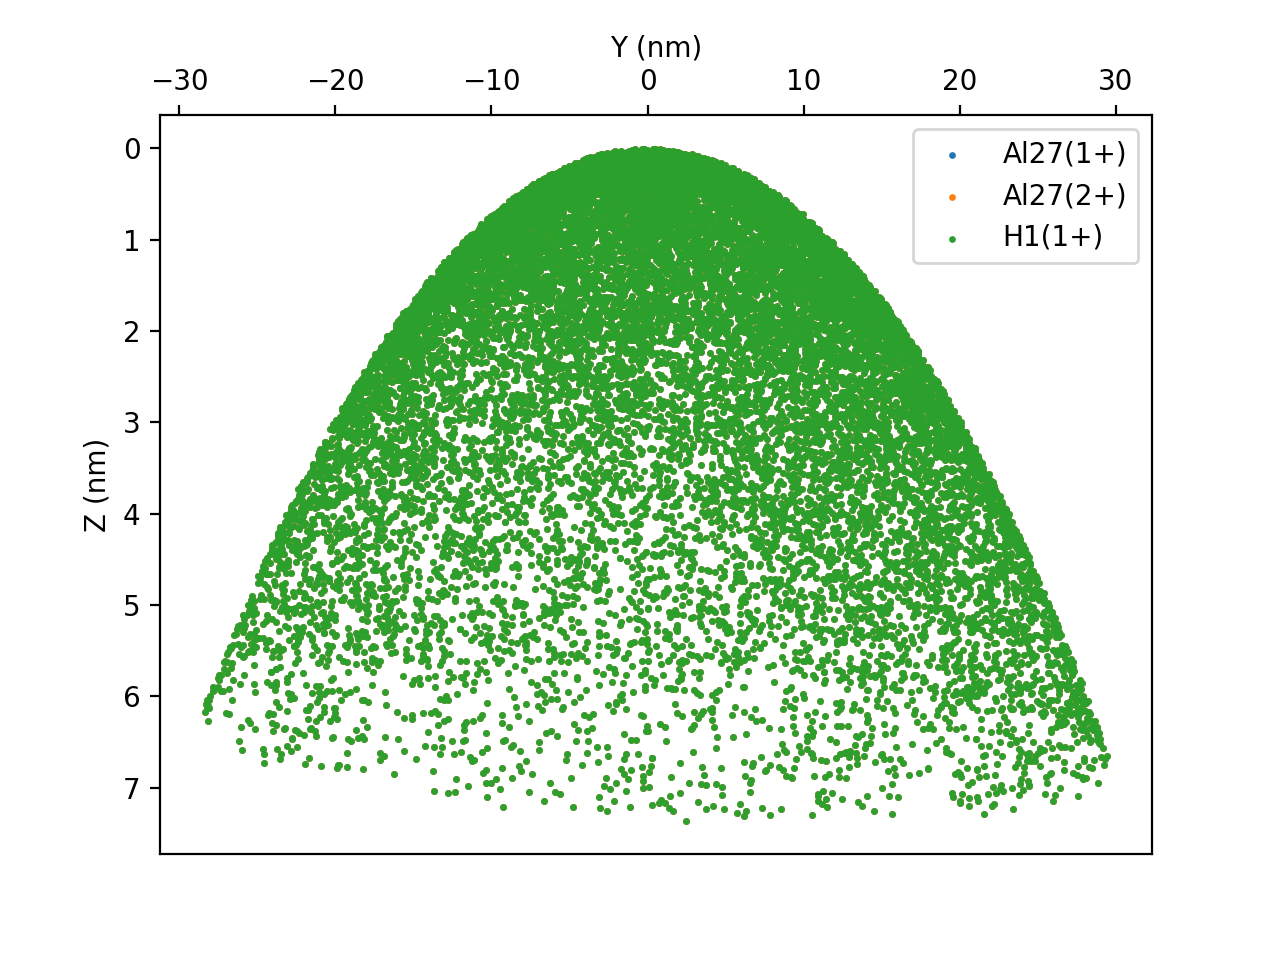

In [30]:
ax = plt.figure().add_subplot(111)
plot_num = 0.01
index_plot= np.random.choice(px, size=int(plot_num * len(px)), replace=False)
index_plot = np.where(index_plot)
for element in phases:
    ax.scatter(py[index_plot], pz[index_plot], s=2, label=element)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.set_xlabel('Y (nm)')
ax.xaxis.set_label_position('top')
ax.set_ylabel('Z (nm)')
plt.legend()
plt.savefig(variables.result_path + '\\output_{fn}.png'.format(fn=figname))

In [68]:
max_plot = 0.01

fig = go.Figure()
for index, elemen in enumerate(phases):
    df_s = data[data['color'].str.contains(colors[index], na=False)]
    remove_n = int(len(df_s) - (len(df_s) * max_plot))
    print(len(df_s))
    drop_indices = np.random.choice(df_s.index, remove_n, replace=False)
    df_subset = df_s.drop(drop_indices)
    print(len(df_subset))
    fig.add_trace(go.Scatter3d(x=df_subset['rx (nm)'], y=df_subset['ry (nm)'], z=df_subset['rz (nm)'], mode='markers',
                               name=elemen,
                               showlegend=True,
                              marker = dict(
                                size=2,
                                color=colors[index],
                                opacity=.2,
                                    )
                              ))
    print(elemen)
fig.update_scenes(
    xaxis_title="x (nm)",
    yaxis_title="y (nm)",
    zaxis_title="z (nm)")
fig.update_layout( legend_title="Elements:", title="APT",)
fig.update_scenes(zaxis_autorange="reversed")
fig.update_layout(legend= {'itemsizing': 'constant'})
plotly.offline.plot(fig, filename=variables.result_path + '\\{fn}.html'.format(fn=figname), show_link=False)
fig.show()

1551591
15516
Al27(1+)
144725
1448
Al27(2+)
949
10
H1(1+)


In [71]:
x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

fig.update_layout(
         width=600,
         height=600,
         scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1.2,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=15, redraw=True), 
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)


def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 20, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames
plotly.offline.plot(fig, filename=variables.result_path + '\\{fn}.html'.format(fn='rota_'+figname), show_link=False)
fig.show()

In [63]:
# save the new data
name_save_file = variables.result_path + '//' + dataset_name + '.h5'
data_tools.store_df_to_hdf(name_save_file, data, 'df')

d:\pyccapt\pyccapt\calibration\calibration_tools\data_tools.py:91: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['element', 'color'], dtype='object')]




In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

mask = np.random.randint(0, len(px), 300)

ax.scatter(px[mask], py[mask], pz[mask])
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_zlabel('Z (nm)')

plt.show()